Прочитайте данные из файла.

Определите оптимальное количество кластеров для прочитанных данных.

Постройте оптимальное разбиение на кластеры.

Спрогнозируйте классы для векторов

[-0.1805, -0.0659, -0.465199, 0.187700, -0.21910998]

и

[0.2226875, -0.133287, 2.8845, 3.2772081, 2.93884]


Постройте график метрики "силуэт" в зависимости от количества кластеров.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

In [2]:
df = pd.read_csv('X.csv', sep = " ", header = None)

In [3]:
df.head()

,0,1,2,3,4
0,0.149014,0.097225,-0.424611,0.075148,0.107336
1,-0.041479,-0.115525,-0.126194,0.103934,0.168235
2,0.194307,-0.203077,-0.102814,-0.204007,0.324915
3,0.456909,0.183503,-0.240683,0.069676,0.316141
4,-0.070246,0.309300,-0.048386,0.087922,-0.413301


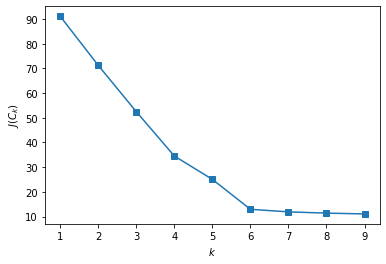

In [4]:
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(df)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, 10), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

Наибольший угол изменений в точке 6, следовательно оптимальное количество класстеров - 6. 

In [5]:
kmeans = KMeans(n_clusters=6, random_state=1).fit(df)

In [6]:
pred = kmeans.predict(df)

In [7]:
pred

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [8]:
vector1 = np.array([-0.1805, -0.0659, -0.465199, 0.187700, -0.21910998])
vector2 = np.array([[0.2226875, -0.133287, 2.8845, 3.2772081, 2.93884]])

In [9]:
kmeans.predict(vector1.reshape(1, -1))

array([5])

In [10]:
kmeans.predict(vector2.reshape(1, -1))

array([0])

In [11]:
metrics.silhouette_score(df, pred)

0.8122759257111298

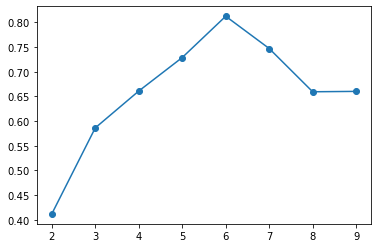

In [12]:
range_n_clusters = np.array(range(2,10))
silhouette_score = []

for i in range_n_clusters:
    kmeans = KMeans(n_clusters = i)
    pred = kmeans.fit_predict(df)
    silhouette_avg = metrics.silhouette_score(df, pred)
    silhouette_score.append(silhouette_avg)

plt.plot(range_n_clusters, silhouette_score)
plt.scatter(range_n_clusters, silhouette_score)
plt.show()